In [1]:
# To handle data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for yeo-johnson transformation
import scipy.stats as stats

# To display all of the colomns
pd.pandas.set_option('display.max_columns', None)
print('SETUP COMPLETE')

SETUP COMPLETE


In [2]:
df = pd.read_csv('../UDEMY/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EXPLORATORY DATA ANALYSIS

## 1. On the Target

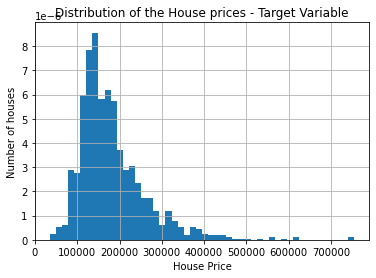

In [3]:
# The distribution
df['SalePrice'].hist(bins=50, density=True)
plt.xlabel('House Price')
plt.ylabel('Number of houses')
plt.title('Distribution of the House prices - Target Variable')
plt.show()

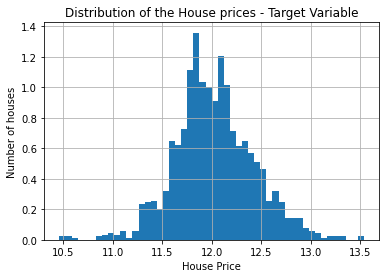

In [4]:
# Log transformation to remove skewness
np.log(df['SalePrice']).hist(bins=50, density=True)
plt.xlabel('House Price')
plt.ylabel('Number of houses')
plt.title('Distribution of the House prices - Target Variable')
plt.show()

## 2. variable types - Numerical or categorical?

In [5]:
# Categorical variable
cat_vars = [var for var in df.columns if df[var].dtype=='O']

# MSSubClass is also categorical by definition of the dataset. Let's add it

cat_vars = cat_vars + ['MSSubClass']

# Recast to categorical to capture the last one added
df[cat_vars] = df[cat_vars].astype('O')
len(cat_vars)

44

In [6]:
# Numerical variable
num_vars = [var for var in df.columns if var not in cat_vars and var!='SalePrice']
len(num_vars)

36

## 3. Variables with missing values

19


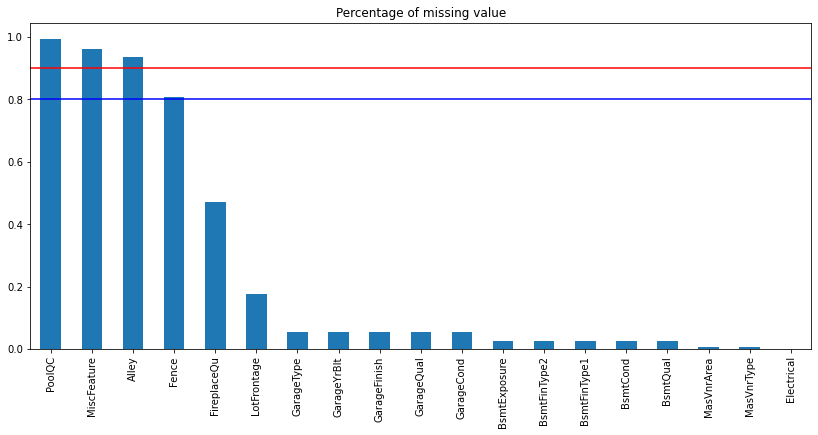

In [7]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
print(len(vars_with_na))

# Mean of the missing values percentage
df[vars_with_na].isnull().mean().sort_values(ascending=False)

# Plot the percentage instead
df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(14,6))
plt.title('Percentage of missing value')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axhline(y=0.8, color='b', linestyle='-')
plt.show()

In [8]:
# From the variables with missing values, how many are numerical and how many are categorical?
num_na = [var for var in cat_vars if var in vars_with_na]
cat_na = [var for var in num_vars if var in vars_with_na]

print('Numerical varibales with missing value: ', len(num_na))
print('Categorical varibales with missing value: ', len(cat_na))

Numerical varibales with missing value:  16
Categorical varibales with missing value:  3


In [9]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

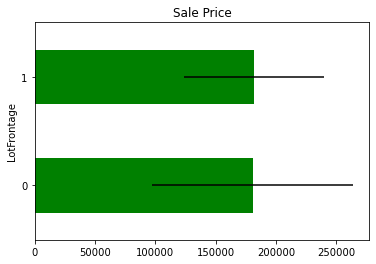

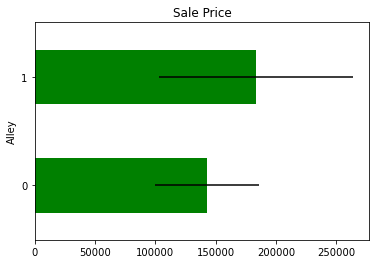

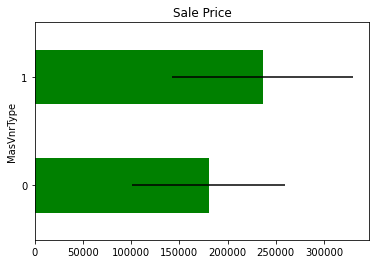

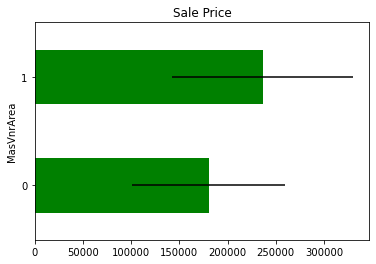

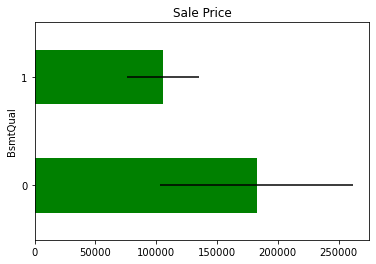

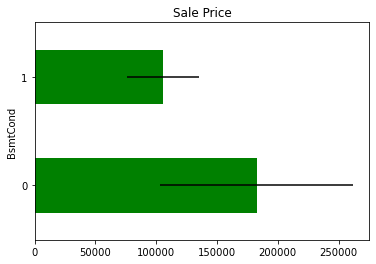

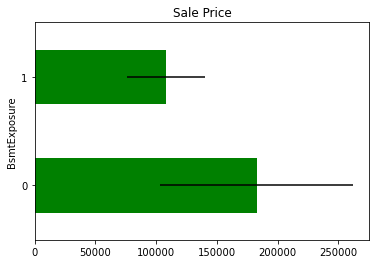

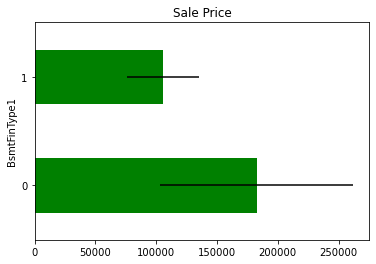

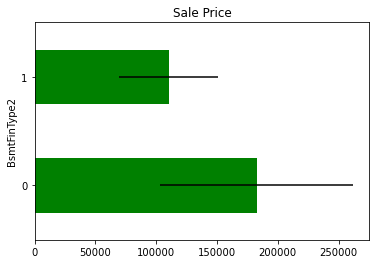

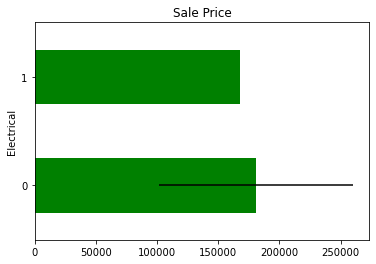

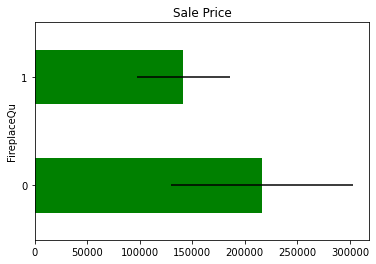

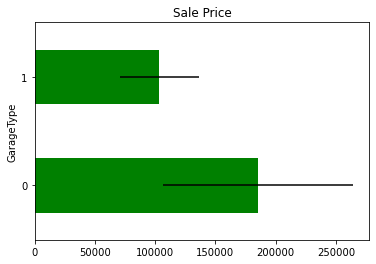

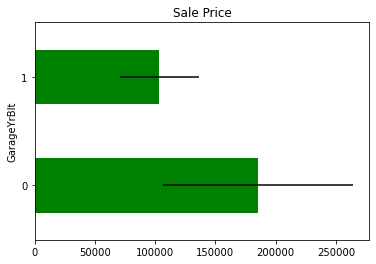

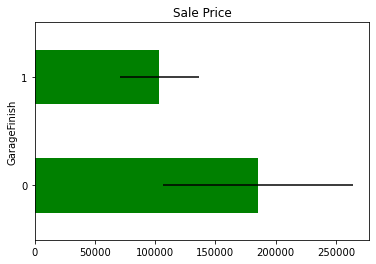

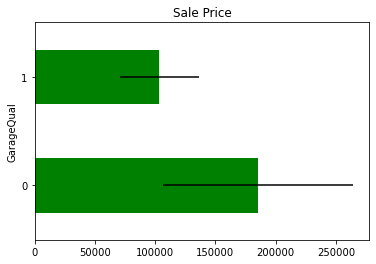

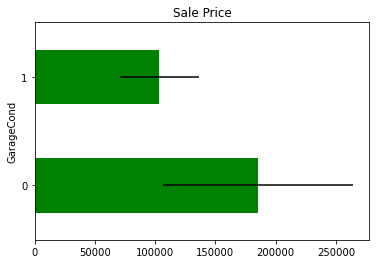

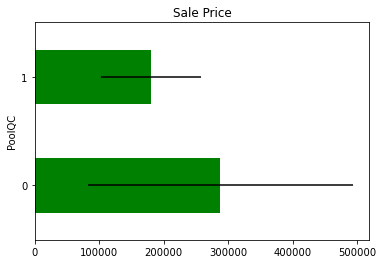

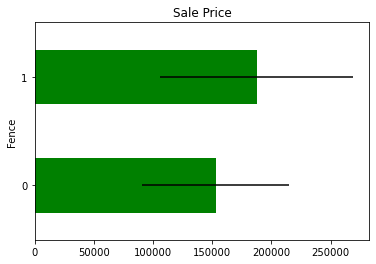

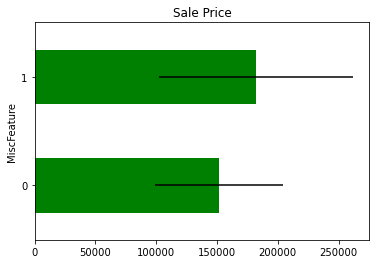

In [10]:
# Let's run the function above on each variable with missing value
for var in vars_with_na:
    analyse_na_value(df, var)

## 4. Year Variables
We generally do not use date variables as is, instead, we capture information in a given way.

In [11]:
# Year variables contain either Year or Yr in the dataset
years_vars = [var for var in num_vars if 'Year' in var or 'Yr' in var]
years_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
# Let's explore the year variables
for var in years_vars:
    print(var, df[var].unique(), '\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

Text(0, 0.5, 'House Sales Price')

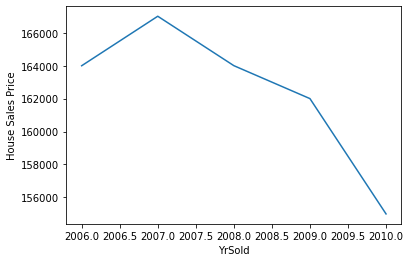

In [13]:
# Plot of median house sales price versus year sold

df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('House Sales Price')

Text(0, 0.5, 'House Sales Price')

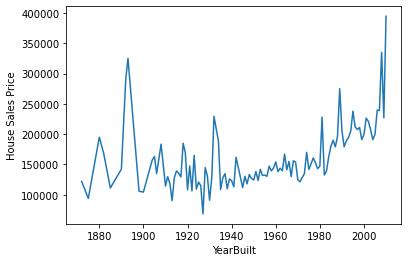

In [14]:
# Plot of median house sales price versus year built
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('House Sales Price')

The above shows that newly built houses are more expensive. 
The previous plot could be because more older houses were sold recently. Let's find out

In [15]:
# Analyze years variables

def analyze_years_vars(df, var):
    df = df.copy()
    
    #capture the difference between the year house was sold and the remaining years variables
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from '+ var)
    
    plt.show()

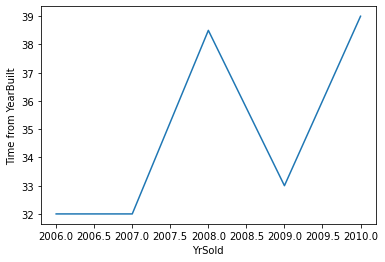

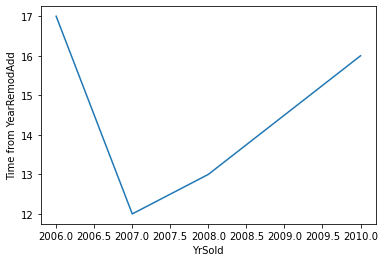

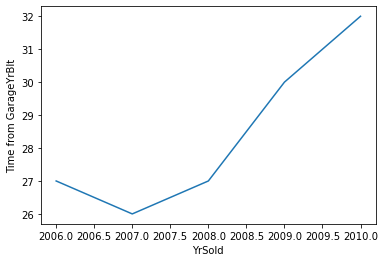

In [16]:
def call_analyze_years_vars():
    
    for var in years_vars:
        if var != 'YrSold':
            analyze_years_vars(df, var)

call_analyze_years_vars()
    

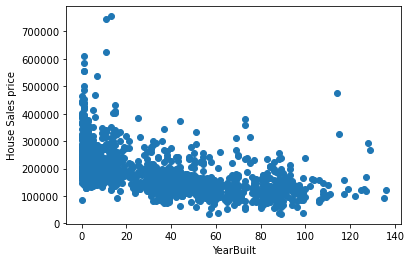

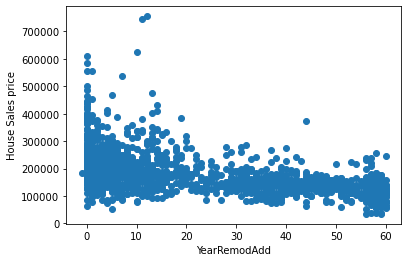

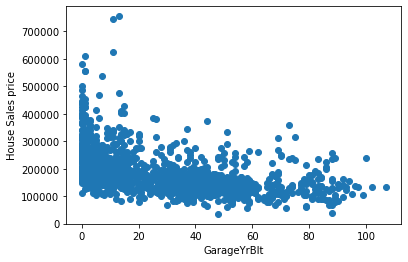

In [17]:
# Analyze years variables - making a scatter plot instead

def analyze_years_vars(df, var):
    df = df.copy()
    
    #capture the difference between the year house was sold and the remaining years variables
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('House Sales price')
    plt.xlabel(var)
    
    plt.show()
call_analyze_years_vars()

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

## 5. Discrete Variables - finite realization

In [18]:
# Let's also make a list of discrete variables
discrete_vars = [var for var in num_vars if var not in years_vars and len(df[var].unique()) < 20]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [19]:
# How does the discrete variables look like
df[discrete_vars].head(10)

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12
5,5,5,1,0,1,1,1,1,5,0,2,0,10
6,8,5,1,0,2,0,3,1,7,1,2,0,8
7,7,6,1,0,2,1,3,1,7,2,2,0,11
8,7,5,0,0,2,0,2,2,8,2,2,0,4
9,5,6,1,0,1,0,2,2,5,2,1,0,1


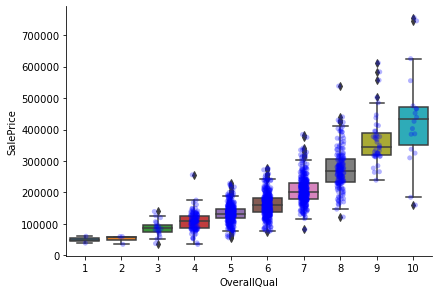

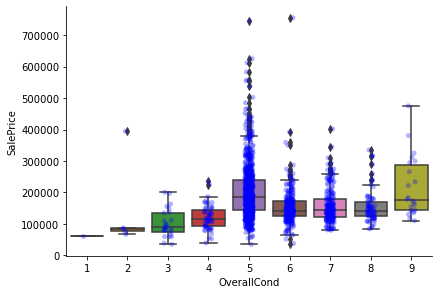

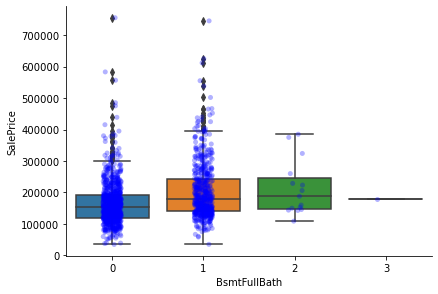

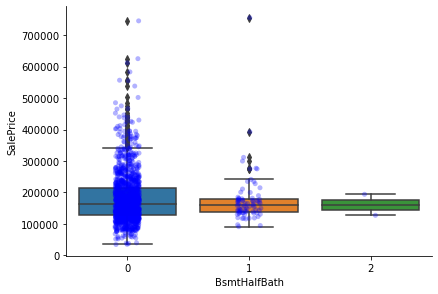

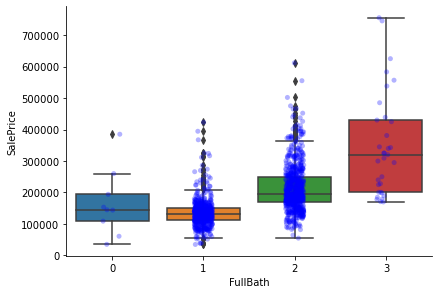

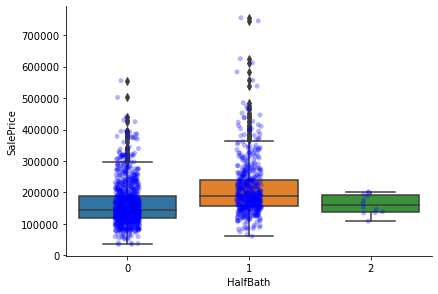

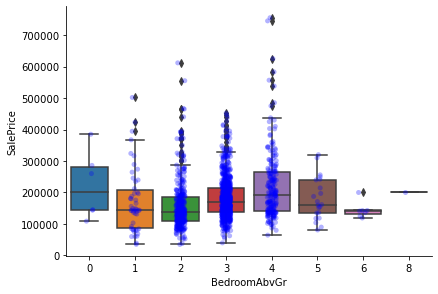

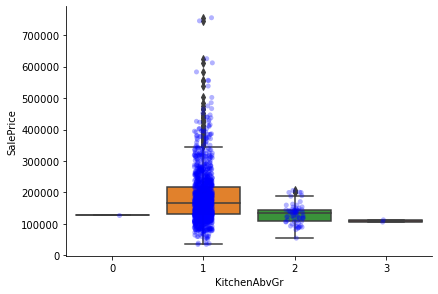

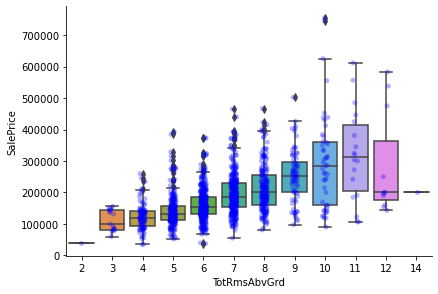

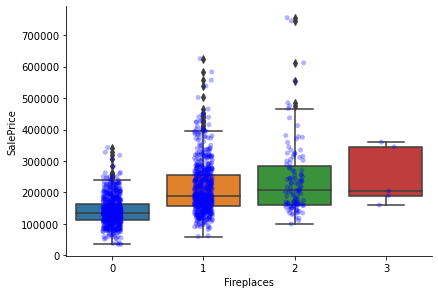

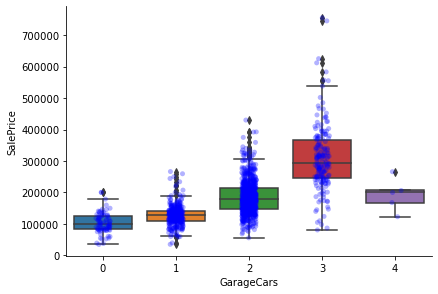

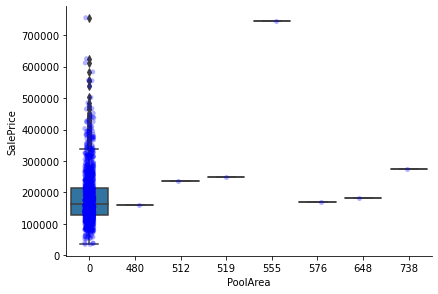

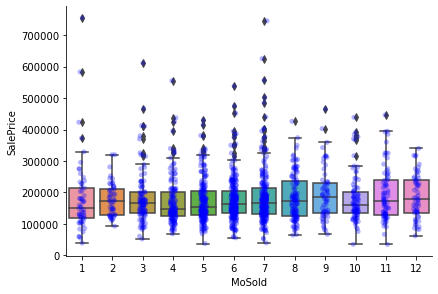

In [20]:
# Plot boxplot for discrete variables
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='b')
    plt.show()

## 6. Continuous variable
This are variables that are neither in temporal variable or in discrete variable

In [21]:
# Again, let's make a list of continuous variables
cont_vars = [var for var in num_vars if var not in years_vars+discrete_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  19


In [22]:
# How does the continuous variables look like?
df[cont_vars].head(10)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0
5,6,85.0,14115,0.0,732,0,64,796,796,566,0,1362,480,40,30,0,320,0,700
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,636,255,57,0,0,0,0
7,8,NaN,10382,240.0,859,32,216,1107,1107,983,0,2090,484,235,204,228,0,0,350
8,9,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,468,90,0,205,0,0,0
9,10,50.0,7420,0.0,851,0,140,991,1077,0,0,1077,205,0,4,0,0,0,0


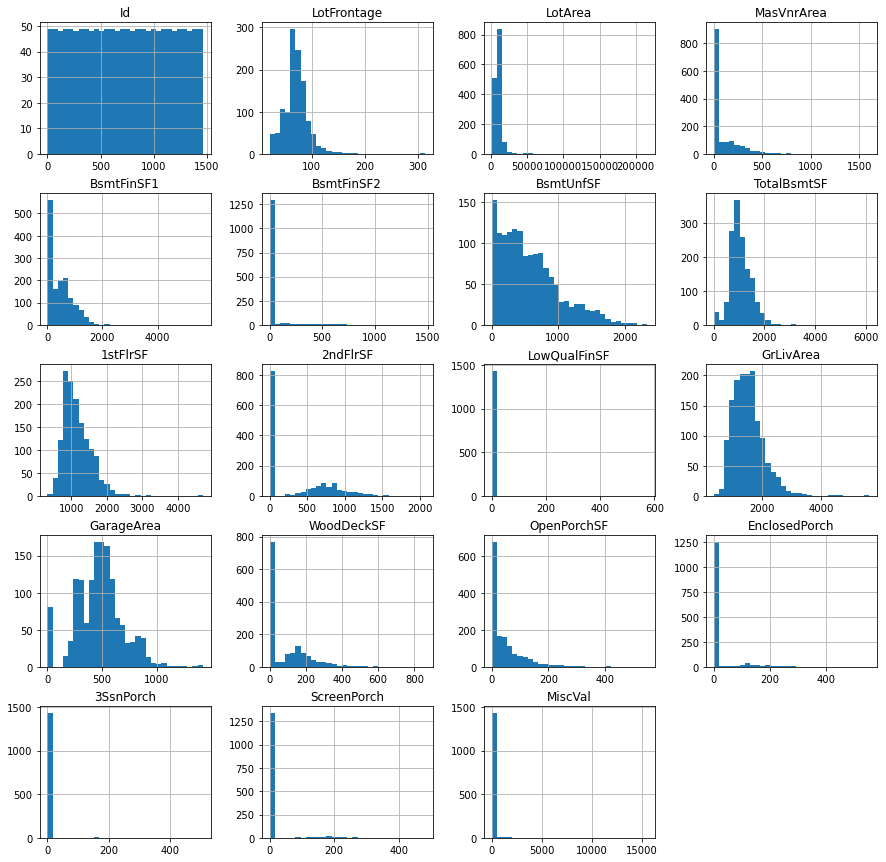

In [23]:
# Visualize the distribution of each of the cont variable
df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()


In [24]:
# Some of the variables are super skewed as seen above, let's capture them in a list
# first make a list with the super skewed variables
# for later

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

not_skewed = [var for var in cont_vars if var not in skewed]
not_skewed

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

### Yeo- Johnson transformation

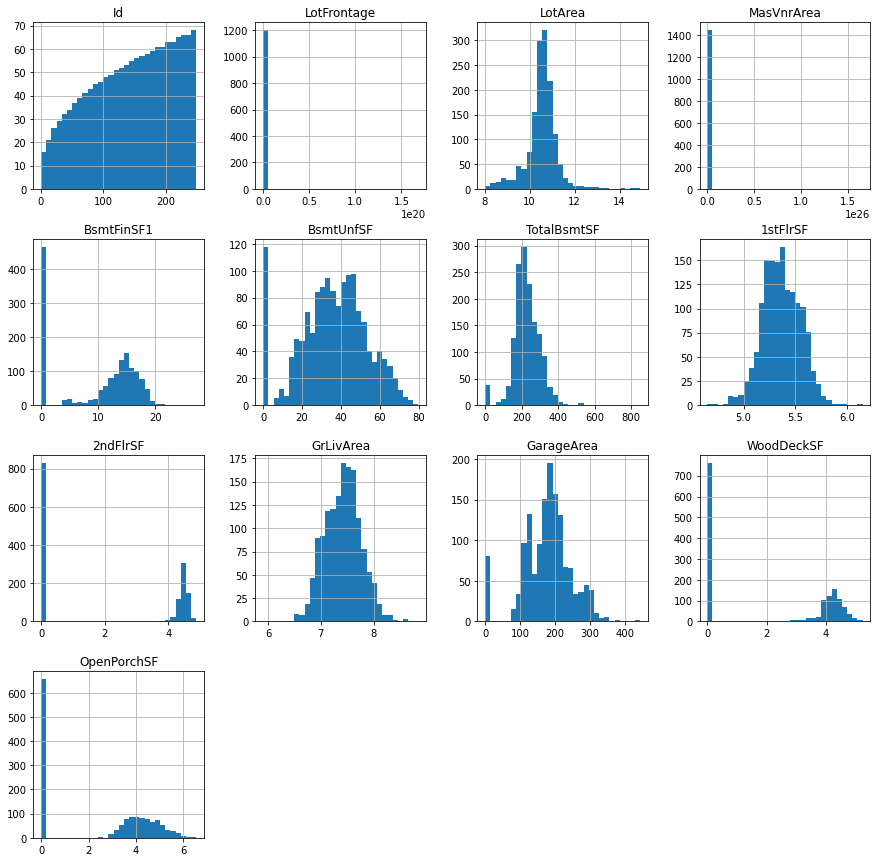

In [26]:
temp_df = df.copy()

for var in not_skewed:
    temp_df[var], param = stats.yeojohnson(df[var])

temp_df[not_skewed].hist(bins=30, figsize=(15,15))
plt.show()

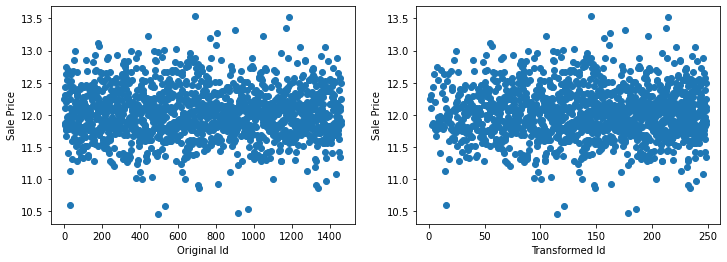

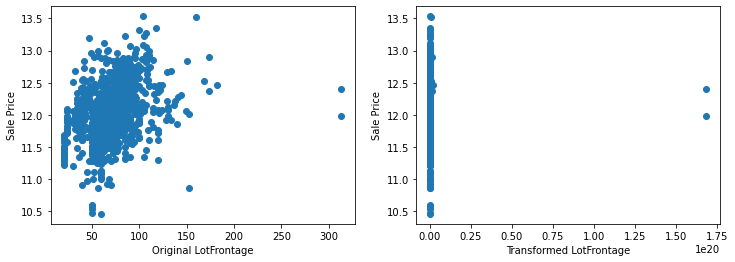

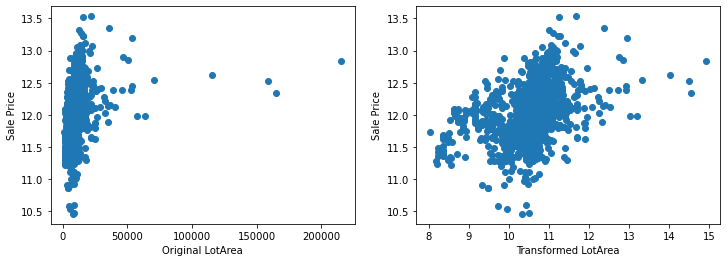

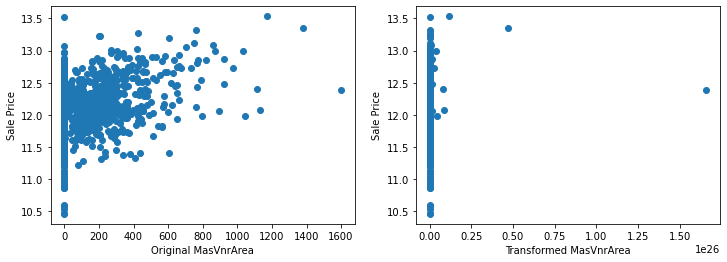

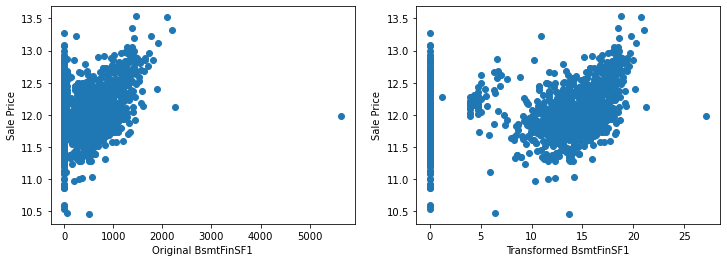

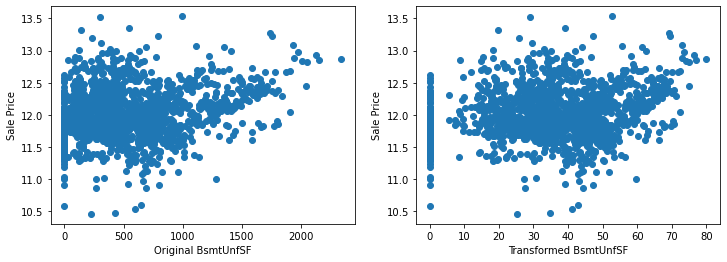

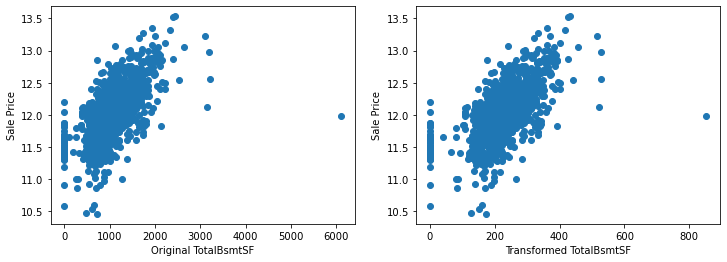

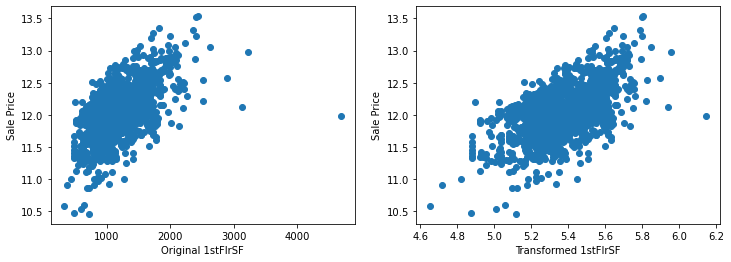

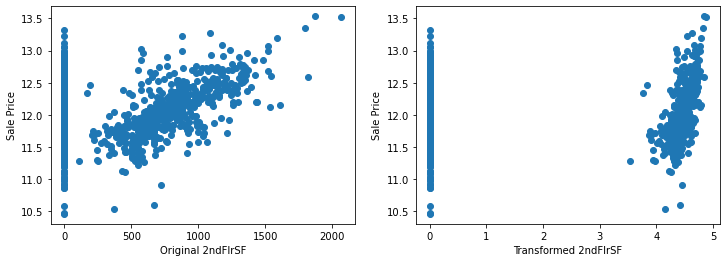

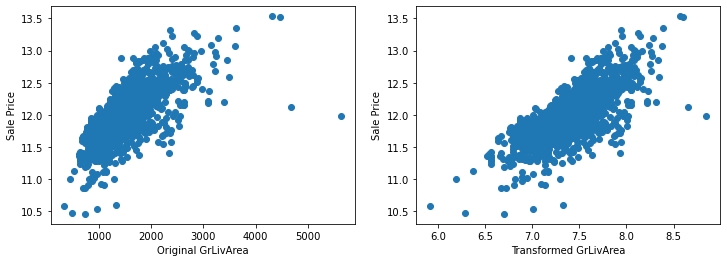

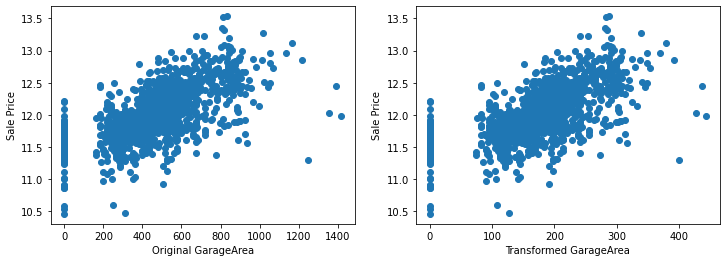

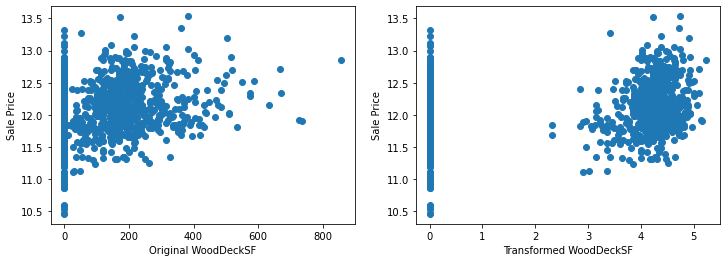

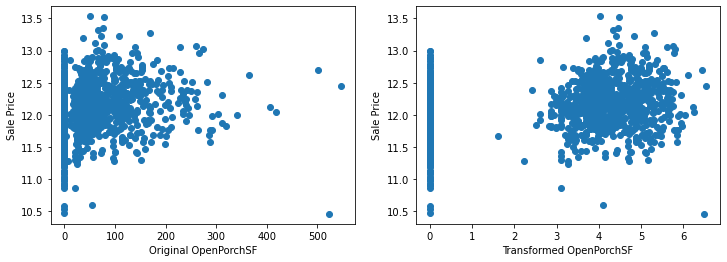

In [30]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in not_skewed:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(temp_df[var], np.log(temp_df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

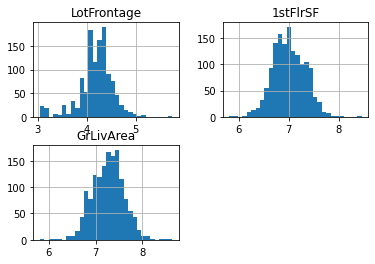

In [31]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = df.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(df[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

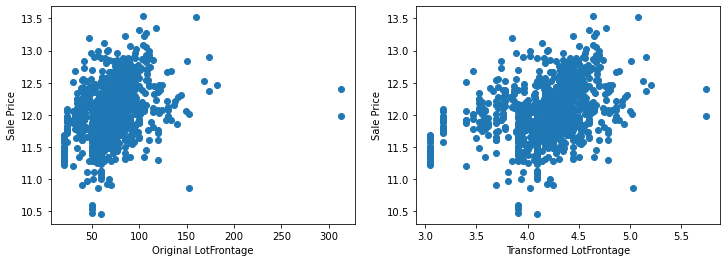

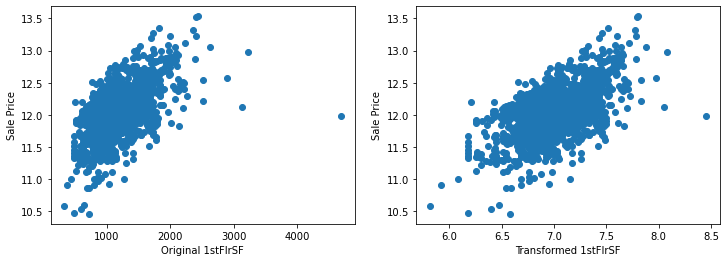

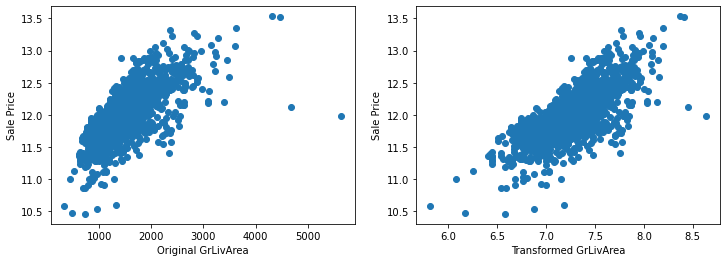

In [33]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

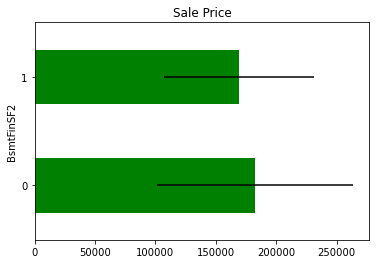

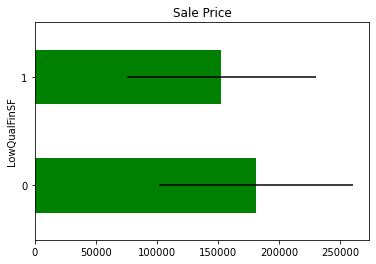

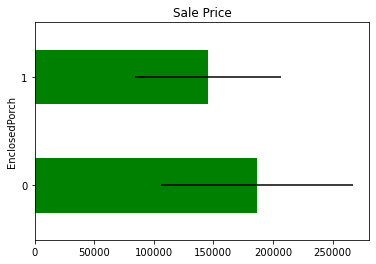

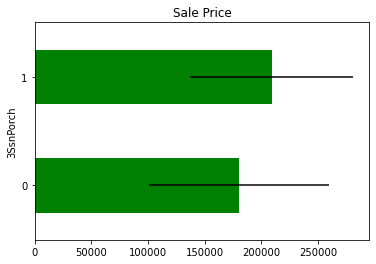

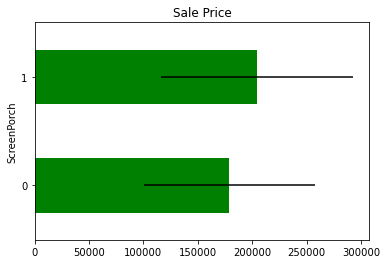

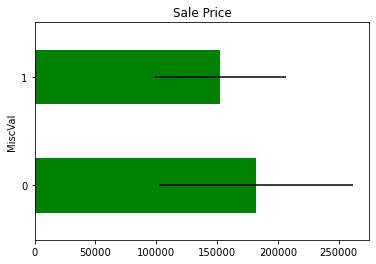

In [34]:
for var in skewed:
    
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()